<a href="https://colab.research.google.com/github/Ashkar077/Big-Mart-Sales-Prediction/blob/main/Big_Mart_Sales_Prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df_train = pd.read_csv("/content/train_v9rqX0R.csv")
df_test = pd.read_csv("/content/test_AbJTz2l.csv")

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_train.shape

(8523, 12)

In [6]:
df_test.shape

(5681, 11)

In [7]:
df_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [8]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [10]:
# Handle missing values in train data
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

<ipython-input-10-310025d1d4d9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
<ipython-input-10-310025d1d4d9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [11]:
# Handle missing values in test data
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

<ipython-input-11-192c96922249>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)
<ipython-input-11-192c96922249>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

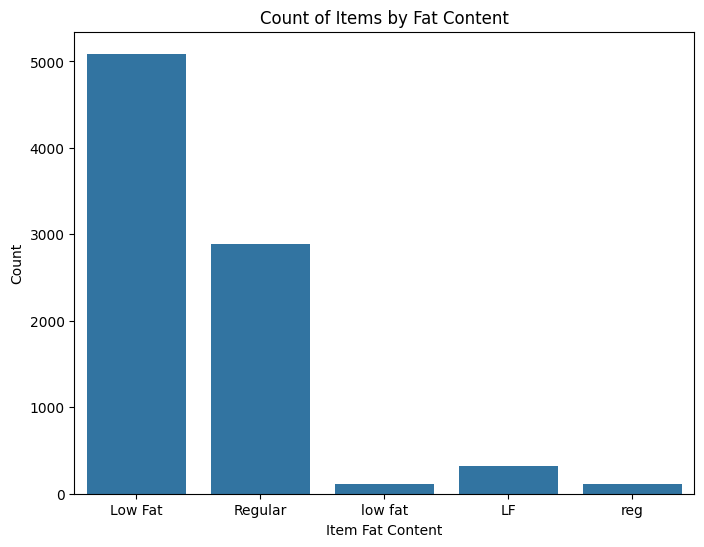

In [13]:
# Visualize the count of items by 'Item_Fat_Content'
plt.figure(figsize=(8, 6))
sns.countplot(x=df_train['Item_Fat_Content'])
plt.title("Count of Items by Fat Content")
plt.xlabel("Item Fat Content")
plt.ylabel("Count")
plt.show()

In [15]:
# Fix inconsistencies in the 'Item_Fat_Content' column
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

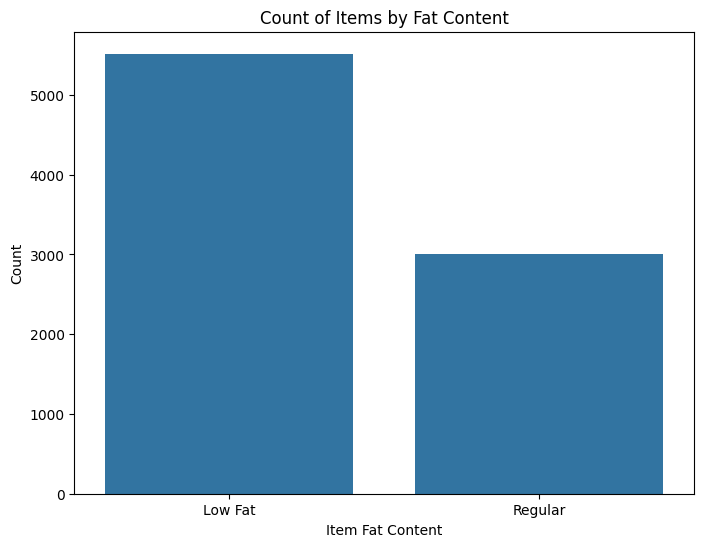

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df_train['Item_Fat_Content'])
plt.title("Count of Items by Fat Content")
plt.xlabel("Item Fat Content")
plt.ylabel("Count")
plt.show()

In [17]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [18]:
df_test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [20]:
# Feature Engineering for train data
df_train['Price_Per_Unit_Weight'] = df_train['Item_MRP'] / df_train['Item_Weight']
df_train['Outlet_Age'] = 2023 - df_train['Outlet_Establishment_Year']

In [21]:
# Feature Engineering for train data
df_test['Price_Per_Unit_Weight'] = df_test['Item_MRP'] / df_test['Item_Weight']
df_test['Outlet_Age'] = 2023 - df_test['Outlet_Establishment_Year']

In [22]:
# One-Hot Encoding for low-cardinality categorical variables
low_cardinality_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
df_train = pd.get_dummies(df_train, columns=low_cardinality_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=low_cardinality_cols, drop_first=True)

In [23]:
# Label Encoding for high-cardinality categorical variables
high_cardinality_cols = ['Item_Identifier', 'Outlet_Identifier']
for col in high_cardinality_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

In [25]:
# Drop unnecessary columns in train data
df_train.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# Drop unnecessary columns in test data
df_test.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

In [27]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Price_Per_Unit_Weight,Outlet_Age,Item_Fat_Content_Regular,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.300000,0.016047,249.8092,9,3735.1380,26.861204,24,False,False,...,False,False,False,True,False,False,False,True,False,False
1,8,5.920000,0.019278,48.2692,3,443.4228,8.153581,14,True,False,...,False,True,False,True,False,False,True,False,True,False
2,662,17.500000,0.016760,141.6180,9,2097.2700,8.092457,24,False,False,...,False,False,False,True,False,False,False,True,False,False
3,1121,19.200000,0.000000,182.0950,0,732.3800,9.484115,25,True,False,...,False,False,False,True,False,False,True,False,False,False
4,1297,8.930000,0.000000,53.8614,1,994.7052,6.031512,36,False,False,...,False,False,False,False,False,False,True,True,False,False
5,758,10.395000,0.000000,51.4008,3,556.6088,4.944762,14,True,False,...,False,False,False,True,False,False,True,False,True,False
6,696,13.650000,0.012741,57.6588,1,343.5528,4.224088,36,True,False,...,True,False,False,False,False,False,True,True,False,False
7,738,12.857645,0.127470,107.7622,5,4022.7636,8.381177,38,False,False,...,True,False,False,True,False,False,True,False,False,True
8,440,16.200000,0.016687,96.9726,7,1076.5986,5.985963,21,True,False,...,False,False,False,True,False,True,False,True,False,False
9,990,19.200000,0.094450,187.8214,2,4710.5350,9.782365,16,True,False,...,False,False,False,True,False,True,False,True,False,False


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   int64  
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int64  
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Price_Per_Unit_Weight            8523 non-null   float64
 7   Outlet_Age                       8523 non-null   int64  
 8   Item_Fat_Content_Regular         8523 non-null   bool   
 9   Item_Type_Breads                 8523 non-null   bool   
 10  Item_Type_Breakfast              8523 non-null   bool   
 11  Item_Type_Canned                 8523 non-null   bool   
 12  Item_Type_Dairy     

In [30]:
# Separate features and target variable in train data
X = df_train.drop('Item_Outlet_Sales', axis=1)
y = df_train['Item_Outlet_Sales']

In [31]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data_scaled = scaler.transform(df_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [35]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [36]:
# Evaluate the Linear Regression model on the validation set
y_pred_lr = lr_model.predict(X_val)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr}")

Linear Regression RMSE: 1069.5950471194324


In [37]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# Evaluate the Random Forest model on the validation set
y_pred_rf = rf_model.predict(X_val)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest RMSE: 1104.5287259909414


In [39]:
# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [40]:
# Evaluate the XGBoost model on the validation set
y_pred_xgb = xgb_model.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")

XGBoost RMSE: 1076.5009777140776


In [42]:
# Generate predictions for the test data using the best model (XGBoost)
test_predictions = lr_model.predict(test_data_scaled)

In [44]:
# Prepare the submission file
submission = pd.read_csv("/content/test_AbJTz2l.csv")
submission = submission[['Item_Identifier', 'Outlet_Identifier']]
submission['Item_Outlet_Sales'] = test_predictions

In [45]:
# Save the submission file
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'")

Submission file saved as 'submission.csv'
